In [2]:
#import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")

In [4]:
df.shape

(11251, 14)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [10]:
df.drop(["Status","Unnamed"], axis=1, inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [13]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
row_with_null_values = df[df.isnull().any(axis=1)]

row_with_null_values

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [18]:
df["Amount"] = df.groupby("Product_Category")["Amount"].transform(lambda x : x.fillna(x.mean()))

In [34]:
checking_rows = df[(df["User_ID"] == 1002092) & (df["Product_ID"] == "P00273442")]

checking_rows

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,61,0,Maharashtra,Western,IT Sector,Auto,1,20191


In [33]:
df["Amount"] = df["Amount"].astype(int)

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [45]:
df.rename(columns = {'Marital_Status': 'Married'} ,inplace=True)

df

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [46]:
def categorize_age(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 50:
        return '46-50'
    elif age <= 55:
        return '50-55'
    else:
        return '55+'

df["Age_Group"] = df["Age"].apply(categorize_age)

df

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,18-25
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,26-35
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,36-45
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,36-45


In [47]:
df.describe()

,User_ID,Age,Married,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [49]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


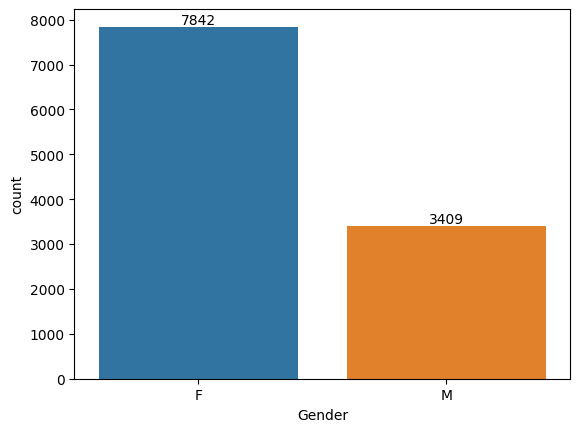

In [54]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x="Gender", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [56]:
df.groupby("Gender", as_index = False)["Amount"].sum()

,Gender,Amount
0,F,74491401
1,M,31948174


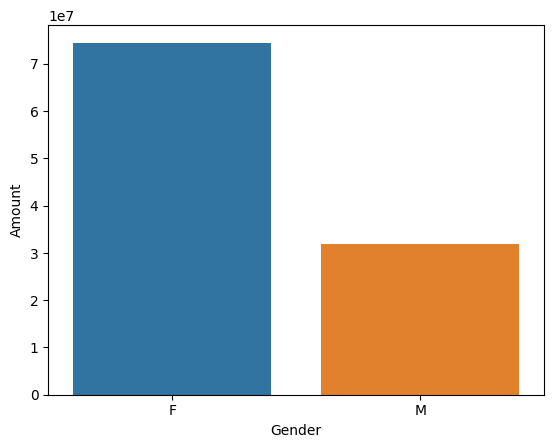

In [60]:
sales_gender = df.groupby("Gender", as_index = False)["Amount"].sum()
ax = sns.barplot(x="Gender",y="Amount",  data= sales_gender)


From the above analysis it is clear that female purchases more than men with respect to count as well as purchasing power

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

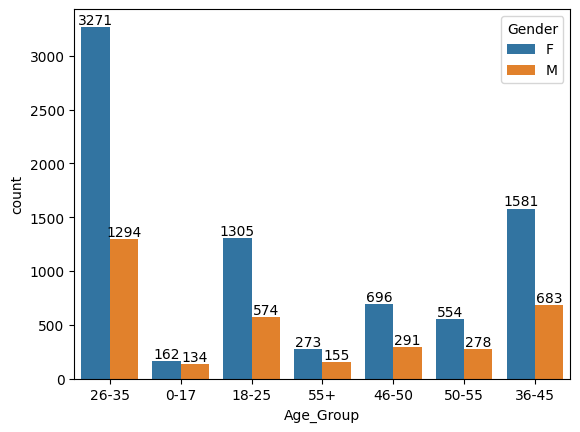

In [66]:
ax = sns.countplot(data = df , x="Age_Group",hue="Gender")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

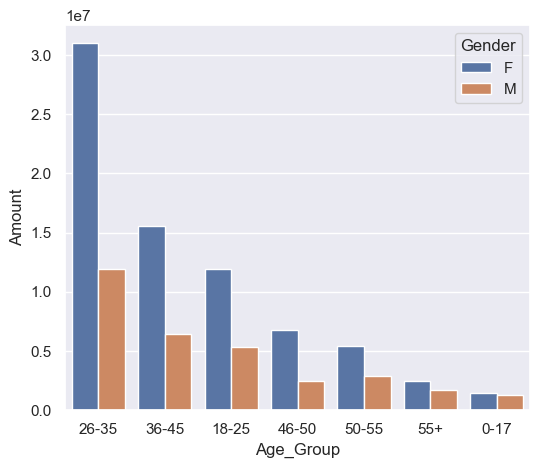

In [96]:
# Total Amount vs Age Group

sales_age = df.groupby(["Age_Group","Gender"],as_index = False)["Amount"].sum().sort_values(by="Amount" ,ascending=False)

sns.barplot(data = sales_age, x="Age_Group", y="Amount" ,hue="Gender")

From the above analysis it is clear that highest buyers is from age_group of 26-35 female

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

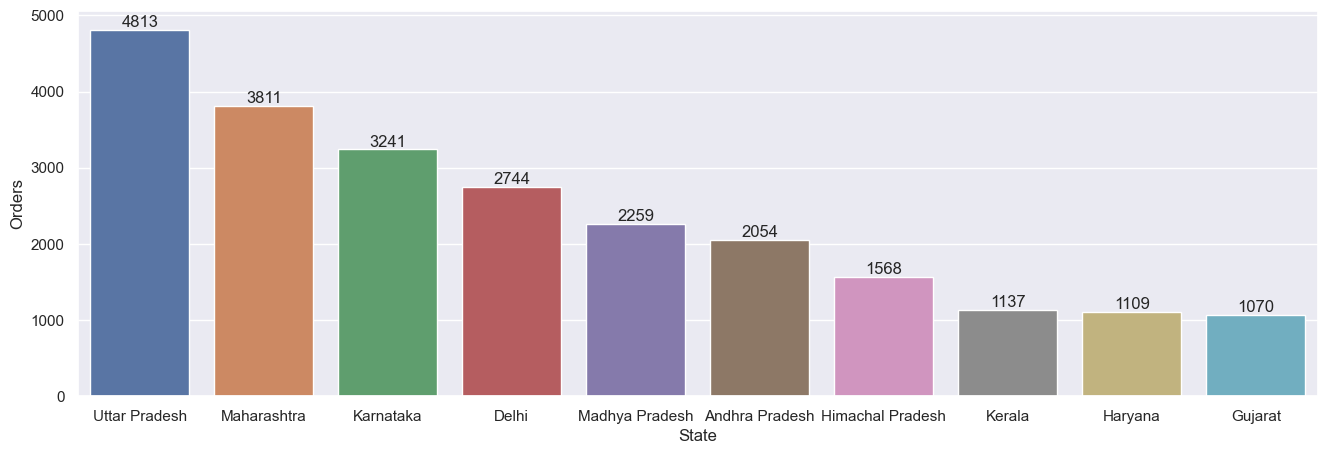

In [81]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by="Orders",ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
ax = sns.barplot(data = sales_state, x="State", y="Orders")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

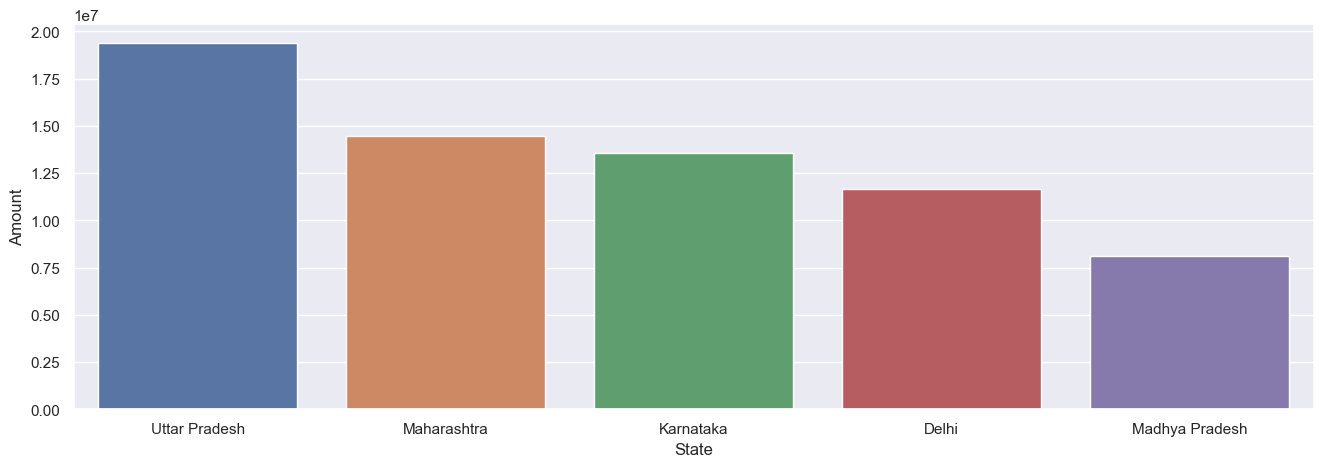

In [86]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index = False)["Amount"].sum().sort_values(by="Amount" , ascending= False).head(5)

sns.barplot(data = sales_state, x="State", y="Amount")

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [87]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

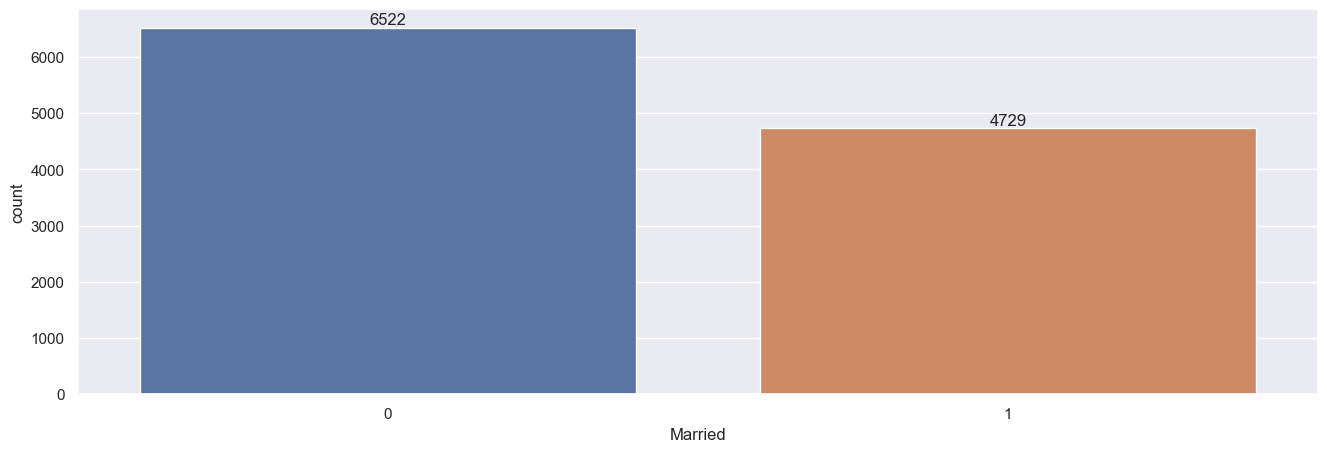

In [90]:
# sales based on marital_status

ax = sns.countplot(data= df, x="Married")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married', ylabel='Amount'>

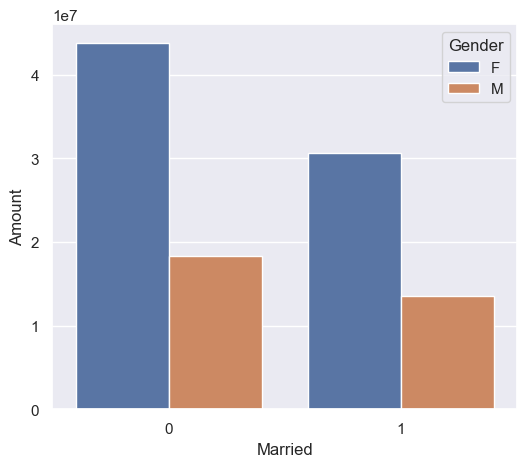

In [94]:
sales_married = df.groupby(['Gender','Married'], as_index = False)["Amount"].sum()

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_married, x="Married", y="Amount" ,hue="Gender")

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

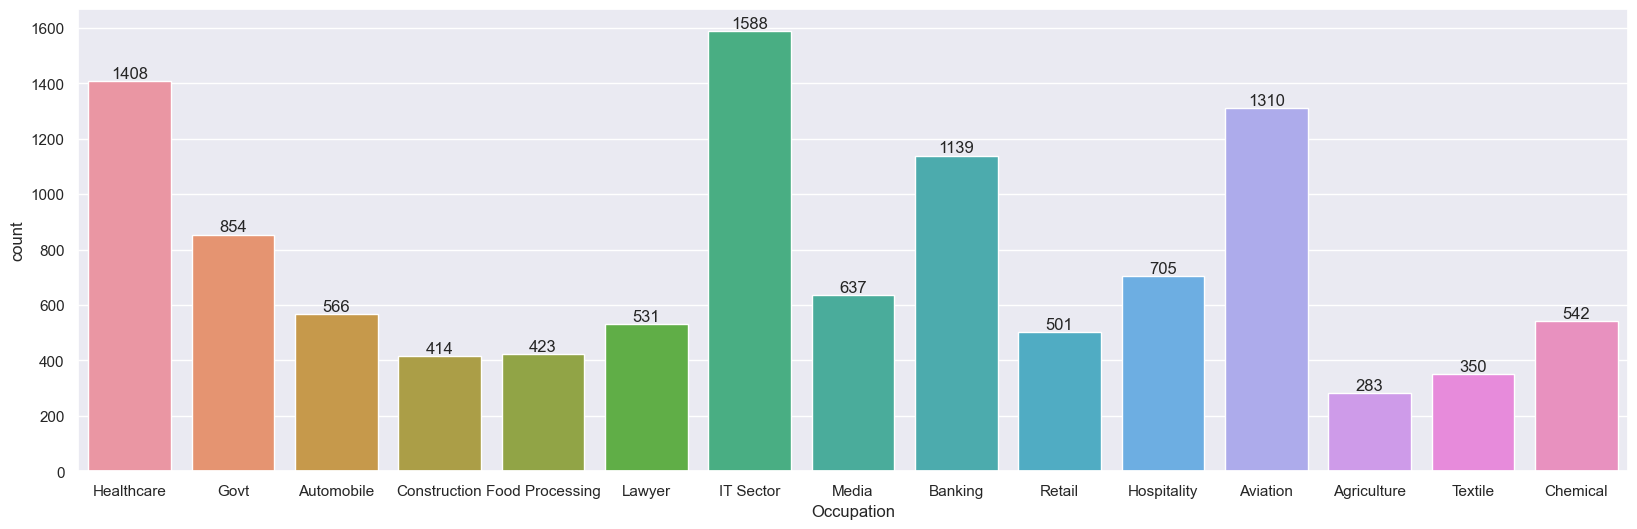

In [104]:
# Sales based on occupation

sns.set(rc = {'figure.figsize':(20,6)})
ax = sns.countplot(data = df, x="Occupation")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

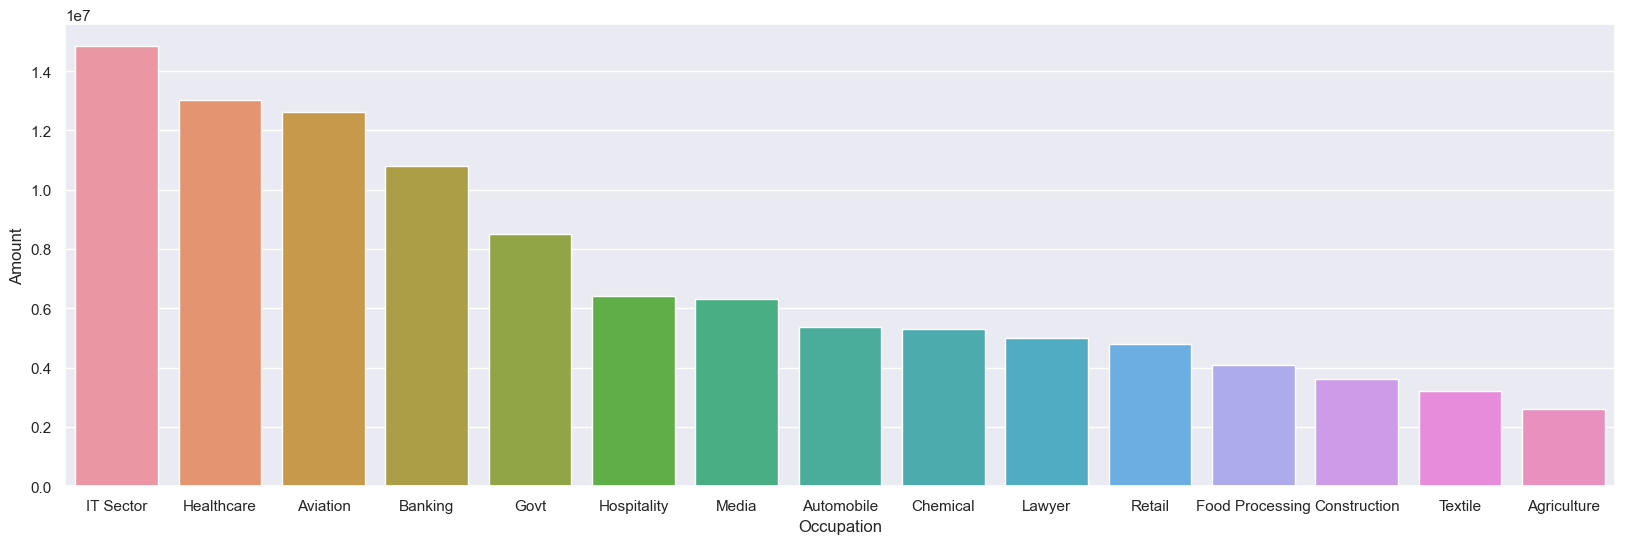

In [108]:
# Occupation Vs Total Amount

sales_occupation = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by="Amount", ascending = False)

sns.barplot(data = sales_occupation , x = "Occupation", y= "Amount")

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

In [109]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

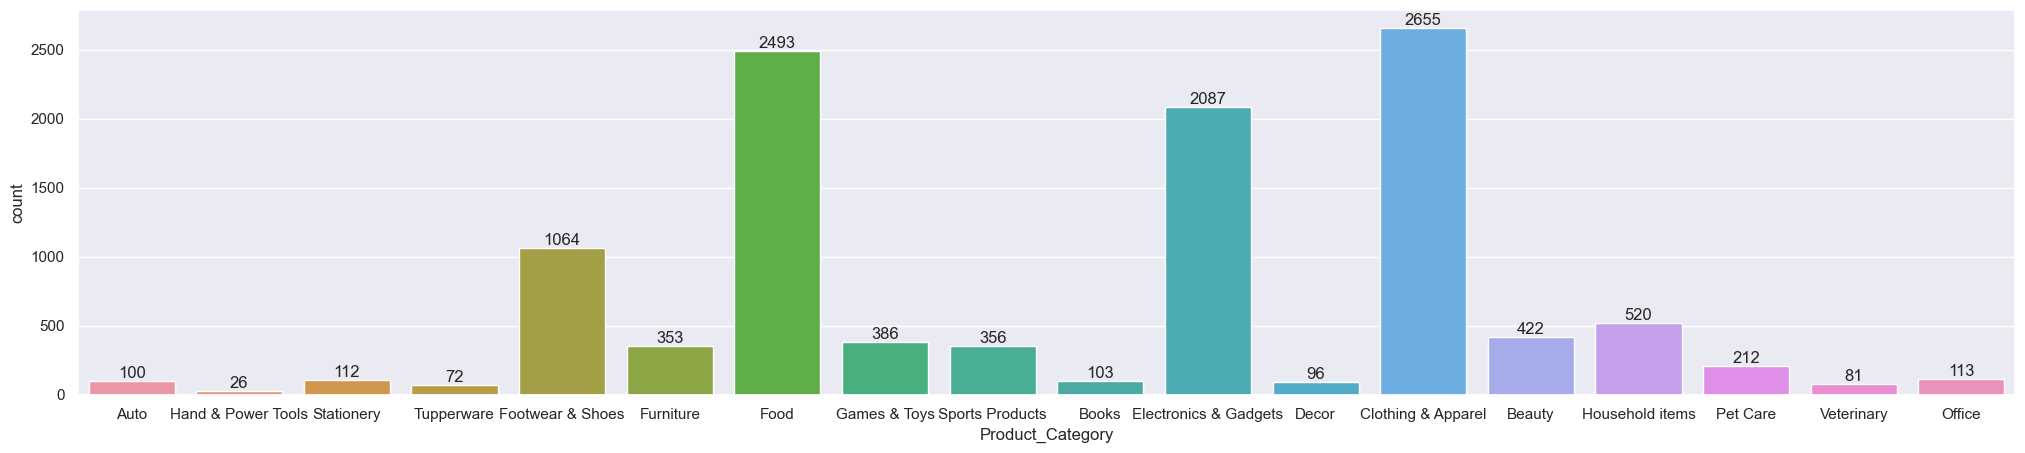

In [112]:
# Product_Category

sns.set(rc={"figure.figsize":(25,5)})
ax = sns.countplot(data = df, x="Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

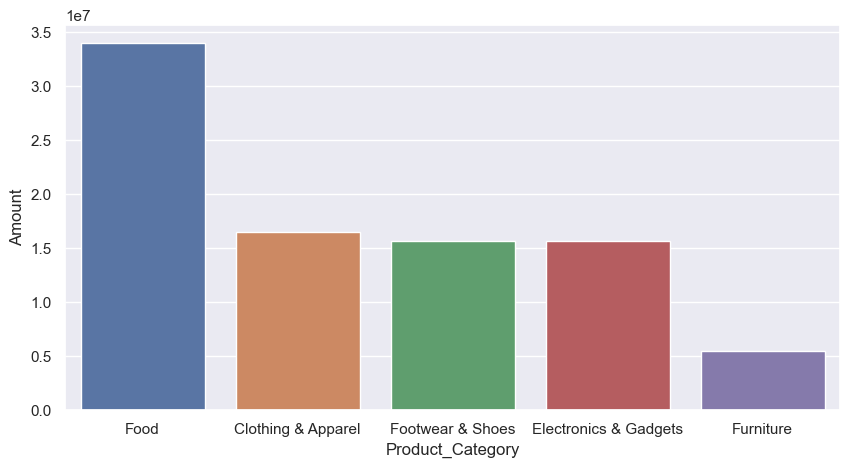

In [116]:
# Product_category Vs Total_amount

sales_product = df.groupby(["Product_Category"],as_index = False)["Amount"].sum().sort_values(by="Amount", ascending = False).head(5)

sns.set(rc={"figure.figsize":(10,5)})
sns.barplot(data = sales_product, x="Product_Category", y="Amount")



From above graphs we can see that most of the sold products are from Food, Clothing and Footwear and Shoes

<Axes: xlabel='Product_ID', ylabel='Orders'>

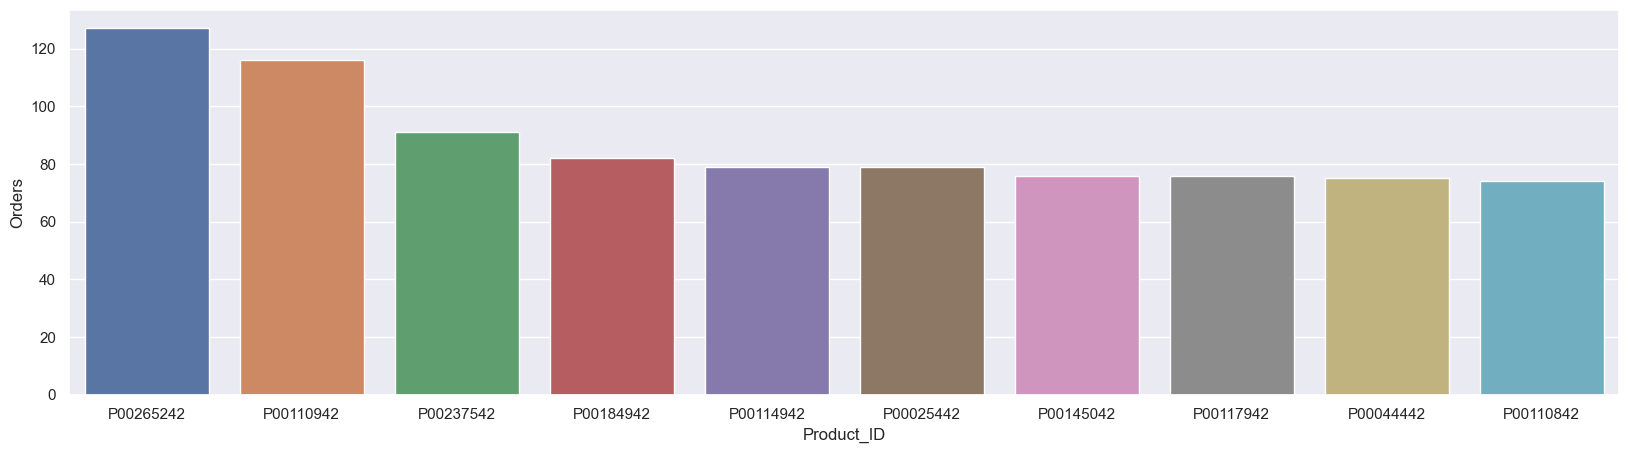

In [119]:
sales_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_product, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

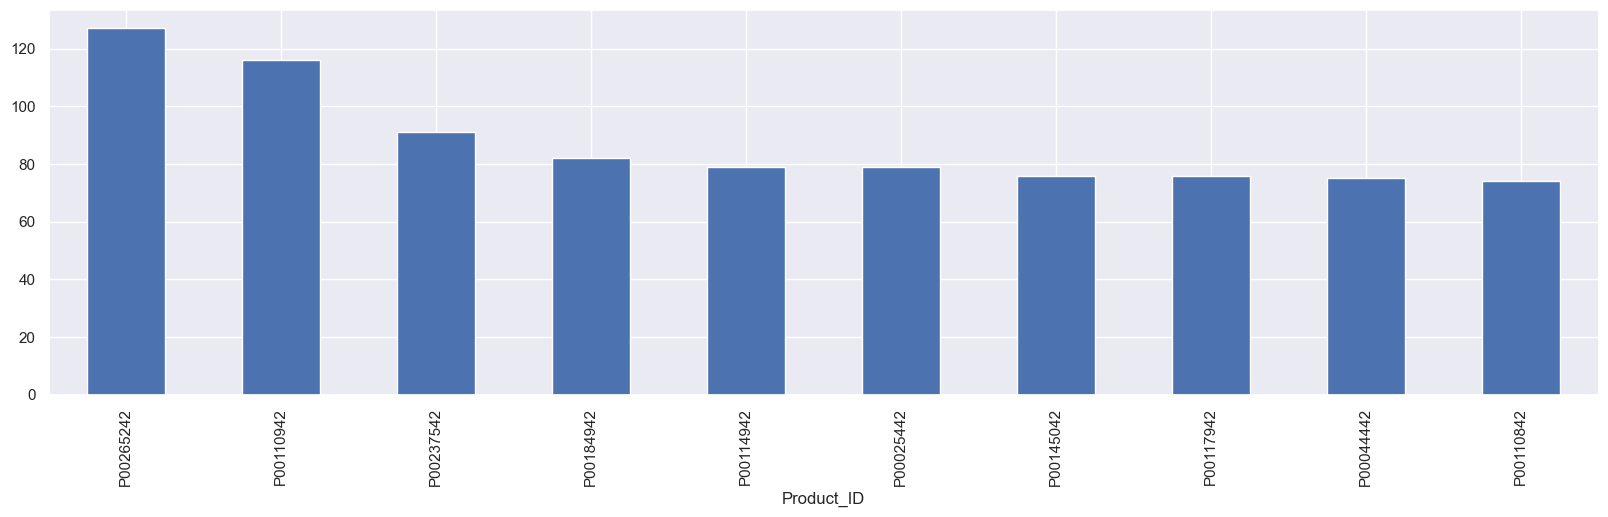

In [136]:
df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category